# Name : Vilohit Keshav Achar
# ID : 23077751

# Name : Mohit Chandrashekhar Attarde
# ID : 23241977



# This code executes to the end without an error.

#  link to the original source where you opted to reuse an existing implementation.

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Import

In [2]:
# DF for Image Path Data
dicom = pd.read_csv('CBIS-DDSM\csv\dicom_info.csv')
dicom.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


## Sort image paths with index data

In [3]:
cropped_images = dicom[dicom.SeriesDescription=='cropped images'].image_path
mammo_images = dicom[dicom.SeriesDescription=='full mammogram images'].image_path
roi_mask_images = dicom[dicom.SeriesDescription=='ROI mask images'].image_path

In [4]:
print(cropped_images)

0        CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3        CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6        CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7        CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10       CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
                               ...                        
10225    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.374221...
10227    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.195242...
10229    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.263713...
10231    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.627982...
10236    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.285138...
Name: image_path, Length: 3567, dtype: object


In [5]:
cropped_images = dicom[dicom.SeriesDescription=='cropped images'].image_path
mammo_images = dicom[dicom.SeriesDescription=='full mammogram images'].image_path
roi_mask_images = dicom[dicom.SeriesDescription=='ROI mask images'].image_path

# Mass Dataset

In [6]:

mass_train = pd.read_csv('CBIS-DDSM/csv/mass_case_description_train_set.csv')
mass_test = pd.read_csv('CBIS-DDSM/csv/mass_case_description_test_set.csv')

mass_train.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [7]:
# Rename Columnns Names
mass_train = mass_train.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

mass_test = mass_test.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

In [8]:
mass_train.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [9]:
mass_test.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....


In [10]:
# fill in missing values using the backwards fill method
mass_train['mass_shape'] = mass_train['mass_shape'].bfill()
mass_train['mass_margins'] = mass_train['mass_margins'].bfill()

mass_test['mass_margins'] = mass_test['mass_margins'].bfill()


#check null values
mass_train.isnull().sum()
mass_test.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [11]:
# check datasets shape
print(f'Shape of mass_train: {mass_train.shape}')
print(f'Shape of mass_test: {mass_test.shape}')

Shape of mass_train: (1318, 14)
Shape of mass_test: (378, 14)


# Cal Case Dataset

In [12]:
calc_train = pd.read_csv('CBIS-DDSM/csv/calc_case_description_train_set.csv')
calc_test = pd.read_csv('CBIS-DDSM/csv/calc_case_description_test_set.csv')

calc_train.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [13]:

calc_train = mass_train.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

calc_test = mass_test.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

In [14]:
calc_train.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [18]:
calc_test.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....


In [ ]:
# fill in missing values using the backwards fill method
calc_train['mass_shape'] = calc_train['mass_shape'].bfill()
calc_train['mass_margins'] = calc_train['mass_margins'].bfill()

calc_test['mass_margins'] = calc_test['mass_margins'].bfill()


#check null values
calc_train.isnull().sum()
calc_test.isnull().sum()

# Data Import

# Visualizations

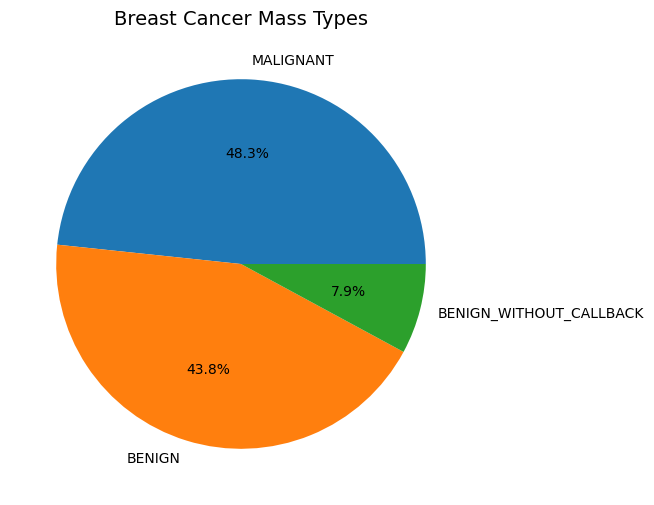

In [15]:
# pathology distributions
value = mass_train['pathology'].value_counts()
plt.figure(figsize=(8,6))

plt.pie(value, labels=value.index, autopct='%1.1f%%')
plt.title('Breast Cancer Mass Types', fontsize=14)
# plt.savefig('/kaggle/working/pathology_distributions_red.png')
plt.show()

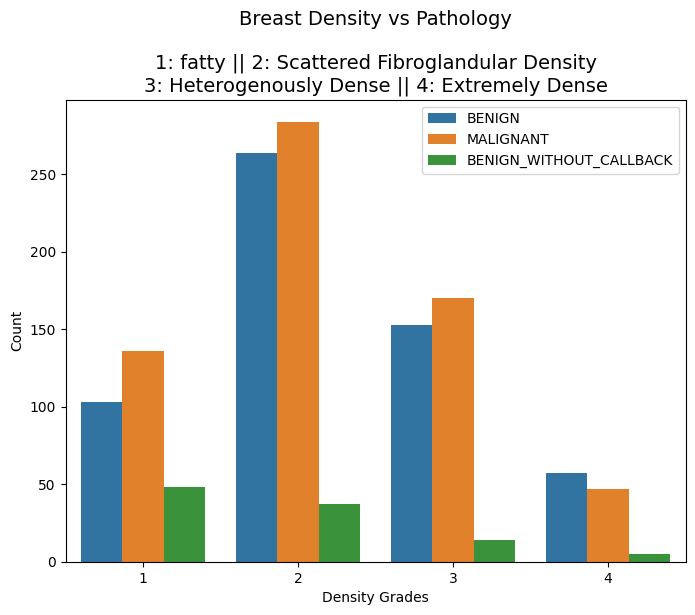

In [16]:
# breast density against pathology
plt.figure(figsize=(8,6))

sns.countplot(mass_train, x='breast_density', hue='pathology')
plt.title('Breast Density vs Pathology\n\n1: fatty || 2: Scattered Fibroglandular Density\n3: Heterogenously Dense || 4: Extremely Dense',
          fontsize=14)
plt.xlabel('Density Grades')
plt.ylabel('Count')
plt.legend()
# plt.savefig('/kaggle/working/density_pathology_red.png')
plt.show()

Full Mammograms:



FileNotFoundError: [Errno 2] No such file or directory: 'Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.422112722213189649807611434612228974994/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/000000.dcm'

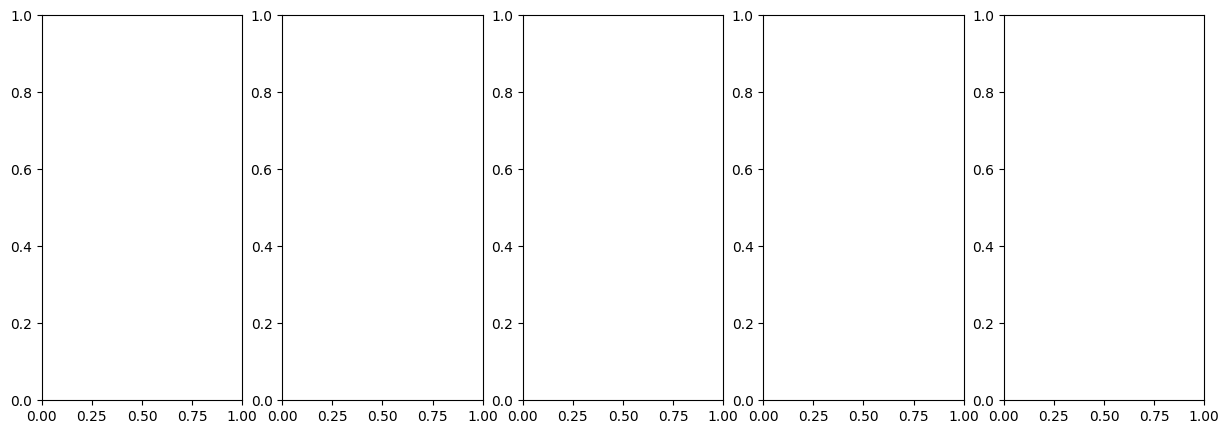

In [17]:
# Display some images
import matplotlib.image as mpimg

# create function to display images
def display_images(column, number):
    # create figure and axes
    number_to_visualize = number
    rows = 1
    cols = number_to_visualize
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))
    
    # Loop through rows and display images
    for index, row in mass_train.head(number_to_visualize).iterrows():
        image_path = row[column]
        image = mpimg.imread(image_path)
        ax = axes[index]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"{row['pathology']}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

print('Full Mammograms:\n')
display_images('image_file_path', 5)
print('Cropped Mammograms:\n')
display_images('cropped_image_file_path', 5)

# Preprocessing Images

In [ ]:
pip install opencv-python opencv-python-headless

In [ ]:
import tensorflow as tf
from tensorflow import keras
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import os

def image_processor(image_path, target_size):
    """Preprocess images for CNN model"""
    absolute_image_path = os.path.abspath(image_path)
    image = cv2.imread(absolute_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (target_size[1], target_size[0]))
    image_array = image / 255.0
    return image_array

# Merge datasets
full_mass = pd.concat([mass_train, mass_test], axis=0)

# Define the target size
target_size = (224, 224, 3)

# Apply preprocessor to train data
full_mass['processed_images'] = full_mass['image_file_path'].apply(lambda x: image_processor(x, target_size))

# Create a binary mapper
class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0} 

# Convert the processed_images column to an array
X_resized = np.array(full_mass['processed_images'].tolist())

# Apply class mapper to pathology column
full_mass['labels'] = full_mass['pathology'].replace(class_mapper)

# Check the number of classes
num_classes = len(full_mass['labels'].unique())



In [ ]:
full_mass['labels'].unique()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resized, full_mass['labels'].values, test_size = 0.2, random_state = 42)

# y_train = to_categorical(y_train, 2)
# y_test = to_categorical(y_test, 2)


print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))

In [ ]:
X_train[0]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of examples to visualize from each class
num_examples_per_class = 5

# Select random examples from the training data for both classes
malignant_indices = np.where(y_train == 1)[0]
benign_indices = np.where(y_train == 0)[0]

malignant_examples = X_train[malignant_indices[:num_examples_per_class]]
benign_examples = X_train[benign_indices[:num_examples_per_class]]

# Plot the examples
plt.figure(figsize=(12, 6))
for i in range(num_examples_per_class):
    plt.subplot(2, num_examples_per_class, i + 1)
    plt.imshow(malignant_examples[i])
    plt.title('Malignant')
    plt.axis('off')

    plt.subplot(2, num_examples_per_class, num_examples_per_class + i + 1)
    plt.imshow(benign_examples[i])
    plt.title('Benign')
    plt.axis('off')

plt.show()


In [ ]:
index = 1
plt.imshow(X_train[index])
plt.title(y_train[index])

# CNN Architecture

In [ ]:
# Import necessary TensorFlow libraries
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU
from keras.optimizers import Adam, SGD, RMSprop, Nadam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from keras.applications import InceptionResNetV2,VGG19,VGG16
from keras.utils import plot_model

# Augment data
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    channel_shift_range=20)

# apply augmentation to training data
image_size=224
train_data_augmented = train_datagen.flow(X_train, y_train, batch_size=16)

mode = VGG16(input_shape=(image_size, image_size, 3), include_top=False, weights='imagenet')
for layer in mode.layers[:-5]:
    layer.trainable = False

# import keras
# def myModel():
#     input = keras.Input(shape=(224, 224, 3))
#     x = keras.layers.Conv2D(64, (3, 3), activation='relu')(input)
#     x = keras.layers.BatchNormalization()(x)
#     x = keras.layers.MaxPooling2D((2, 2))(x)
#     x = keras.layers.Dropout(0.2)(x)

#     x = keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
#     x = keras.layers.BatchNormalization()(x)
#     x = keras.layers.MaxPooling2D((2, 2))(x)
#     x = keras.layers.Dropout(0.2)(x)

#     x = keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
#     x = keras.layers.BatchNormalization()(x)
#     x = keras.layers.MaxPooling2D((2, 2))(x)
#     x = keras.layers.Dropout(0.2)(x)

# #     x = keras.layers.Conv2D(512, (3, 3), activation='relu')(x)
# #     x = keras.layers.BatchNormalization()(x)
# #     x = keras.layers.MaxPooling2D((2, 2))(x)
# #     x = keras.layers.Dropout(0.4)(x)

#     x = keras.layers.Flatten()(x)
#     x = keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))(x)
#     x = keras.layers.Dropout(0.4)(x)
#     x = keras.layers.Dense(264, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))(x)
#     x = keras.layers.Dropout(0.4)(x)

#     out1 = keras.layers.Dense(1, activation='sigmoid', name='Char1')(x)
#     model = keras.models.Model(inputs=input, outputs=[out1,])
    
#     return model



# instantiate CNN model
model = tf.keras.Sequential([mode,
    Flatten(),
    Dense(128, activation='relu'
          , kernel_regularizer=l2(0.01)
         ),
    Dense(1, activation='sigmoid')
])


# Create an EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)


# compile model
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.0001), 
              metrics=['accuracy'])

# train model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 40 , batch_size = 75)

In [ ]:
# # Import necessary TensorFlow libraries
# from keras.callbacks import EarlyStopping
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU
# from keras.optimizers import Adam, SGD, RMSprop, Nadam
# from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.regularizers import l2
# from keras.applications import InceptionResNetV2,VGG19,VGG16
# from keras.utils import plot_model

# # Augment data
# train_datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest',
#     channel_shift_range=20)

# # apply augmentation to training data
# image_size=224
# train_data_augmented = train_datagen.flow(X_train, y_train, batch_size=16)

# mode = InceptionResNetV2(input_shape=(image_size, image_size, 3), include_top=False, weights='imagenet')
# for layer in mode.layers[:-5]:
#     layer.trainable = False

# # instantiate CNN model
# model = tf.keras.Sequential([mode,
#     Flatten(),
#     Dense(128, activation='relu'
#           , kernel_regularizer=l2(0.01)
#          ),
#     Dense(1, activation='sigmoid')
# ])


# # Create an EarlyStopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)


# # compile model
# model.compile(loss='binary_crossentropy', 
#               optimizer=Adam(learning_rate=0.0001), 
#               metrics=['accuracy'])

# # train model
# history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 40 , batch_size = 75)

In [ ]:
# # Import necessary TensorFlow libraries
# from keras.callbacks import EarlyStopping
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU
# from keras.optimizers import Adam, SGD, RMSprop, Nadam
# from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.regularizers import l2
# from keras.applications import InceptionResNetV2,VGG19,VGG16, EfficientNetB7
# from keras.utils import plot_model

# # Augment data
# train_datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest',
#     channel_shift_range=20)

# # apply augmentation to training data
# image_size=224
# train_data_augmented = train_datagen.flow(X_train, y_train, batch_size=16)

# mode = EfficientNetB7(input_shape=(image_size, image_size, 3), include_top=False, weights='imagenet')
# for layer in mode.layers[:-5]:
#     layer.trainable = False

# # instantiate CNN model
# model = tf.keras.Sequential([mode,
#     Flatten(),
#     Dense(128, activation='relu'
#           , kernel_regularizer=l2(0.01)
#          ),
#     Dense(1, activation='sigmoid')
# ])


# # Create an EarlyStopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)


# # compile model
# model.compile(loss='binary_crossentropy', 
#               optimizer=Adam(learning_rate=0.0001), 
#               metrics=['accuracy'])

# # train model
# history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 40 , batch_size = 75)

# Evaluation

In [ ]:
model.evaluate(X_test, y_test)

# Classification Report

In [ ]:
import matplotlib.pyplot as plt

# Visualize model history
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('training / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()